In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy as sp
import os

from skimage import img_as_float
from skimage.morphology import reconstruction, h_maxima, h_minima
from skimage import morphology

import torch
import torch.nn.functional as F

In [2]:
abs_path = '/home/Dataset/scl/'
path = 'patch_images/2021.01.11/LBC199-20210106(1)/LBC199-20210106(1)_1601.png'
# patch_images/2021.01.06/LBC38-20210102(1)/LBC38-20210102(1)_727.png

(2048, 2048, 3)


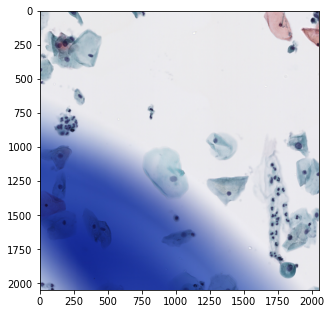

In [108]:
img = cv2.imread(abs_path + path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.medianBlur(img, 7)
print(img.shape)

plt.figure(figsize=(5, 10))
plt.imshow(img);

img = cv2.imread(abs_path + path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.medianBlur(img, 7)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
th3 = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,1.2)
# th3 = cv2.medianBlur(th3, 7)
plt.figure(figsize=(5, 10))
plt.imshow(~th3)

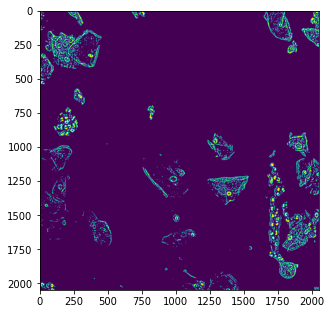

In [160]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# gray_img = (gray_img > 100) & (gray_img < 200)
gray_img = (gray_img < 200)
th4 = gray_img * (~th3)
plt.figure(figsize=(5, 10))
plt.imshow(th4)

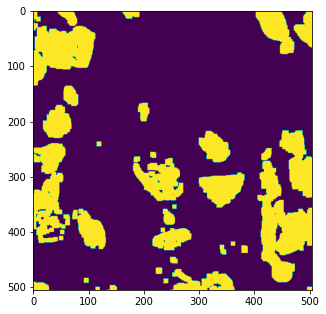

In [176]:
image_size = 2048
kernel_size = 32
stride = 4
kernel = torch.ones((1, 1, kernel_size, kernel_size))
bin_iou = F.conv2d(torch.tensor(th4).reshape(1,1,image_size,image_size).float(), 
                    kernel, stride=stride)
bin_iou.shape
bin_iou = bin_iou > 100
plt.figure(figsize=(5, 10))
plt.imshow(bin_iou.squeeze())

505


/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


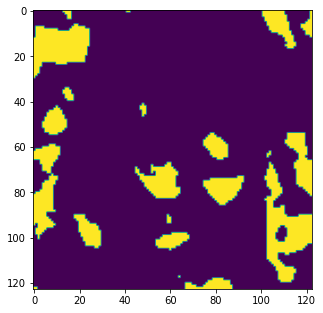

In [183]:
image_size = bin_iou.squeeze().shape[0]
print(image_size)
kernel_size = 16
stride = 4
kernel = torch.ones((1, 1, kernel_size, kernel_size))
bin_iou1 = F.conv2d(torch.tensor(bin_iou.squeeze()).reshape(1,1,image_size,image_size).float(), 
                    kernel, stride=stride)
bin_iou1.shape
bin_iou1 = bin_iou1 > 200
plt.figure(figsize=(5, 10))
plt.imshow(bin_iou1.squeeze())

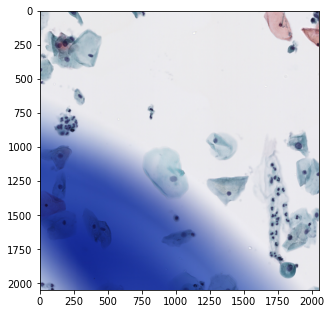

In [191]:
img = cv2.imread(abs_path + path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.medianBlur(img, 7)
plt.figure(figsize=(5, 10))
plt.imshow(img)

[[255 136   0 ... 144   0   0]
 [252  84   0 ... 152   0   0]
 [124  40  14 ... 130   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 196 220 255]
 [  0   0   0 ... 144 168 224]]


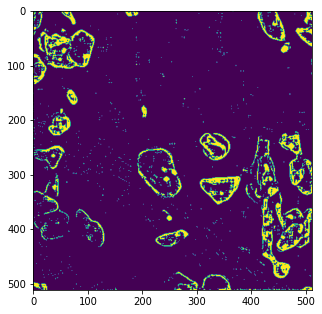

In [220]:
img = cv2.imread(abs_path + path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (512,512))
img = cv2.medianBlur(img, 11)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
laplacian = cv2.Laplacian(gray_img,cv2.CV_8U,ksize=5)
print(laplacian)
laplacian = laplacian > 30
plt.figure(figsize=(5, 10))
plt.imshow(laplacian)
# laplacian

array([[ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

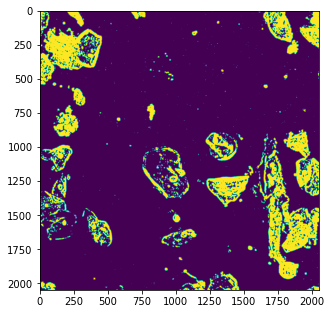

In [202]:
blur = cv2.blur(laplacian, (10,10))
blur = blur > 10
plt.figure(figsize=(5, 10))
plt.imshow(blur)
blur

In [185]:
laplacian

array([[255, 255,   0, ...,   0,   0,   0],
       [255, 216,   0, ...,   0,   0,   0],
       [255, 218,   0, ...,   0,  46, 124],
       ...,
       [  0,   0,   0, ...,  22,  46,  92],
       [  0,   0,   0, ...,  38,  24,  40],
       [  0,   0,   0, ...,  48,  16,  16]], dtype=uint8)

(2048, 2048)
<class 'numpy.ndarray'>


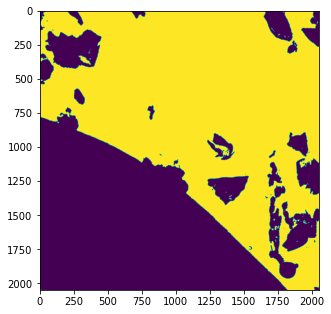

In [130]:
img = cv2.imread(abs_path + path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.medianBlur(img, 7)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# gray_img = (gray_img > 100) & (gray_img < 200)
gray_img = (gray_img > 200)
print(gray_img.shape)
print(type(gray_img))
plt.figure(figsize=(5, 10))
plt.imshow(gray_img)
# res = cv2.resize(gray_img, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
# print(res.shape)

In [157]:
gray_img[2043:,:10]

array([[False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
         True],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
res = cv2.resize(gray_img, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
print(res.shape)

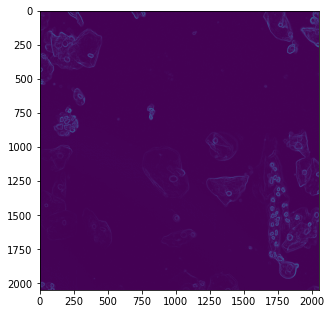

In [5]:
ver, hor = np.gradient(gray_img)
# img = (ver + hor)/2
ver = np.square(ver)
hor = np.square(hor)
grad_img = np.sqrt(ver + hor)

plt.figure(figsize=(5, 10))
plt.imshow(grad_img)

In [16]:
np.min(grad_img)

0.0

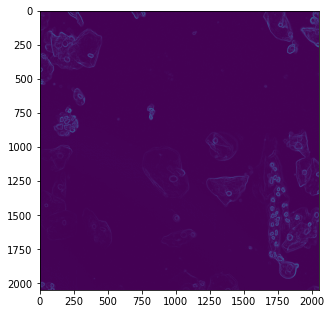

In [19]:
scaled_grad_img = (255.0/grad_img.max()) * grad_img
plt.figure(figsize=(5, 10))
plt.imshow(scaled_grad_img)

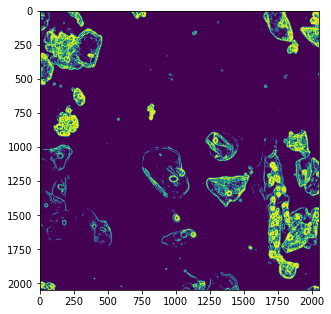

In [35]:
grad_bin_img = scaled_grad_img.astype(np.uint8) > 5

plt.figure(figsize=(5, 10))
plt.imshow(grad_bin_img)

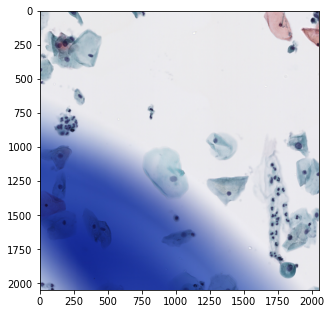

In [36]:
img = cv2.imread(abs_path + path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.medianBlur(img, 7)


plt.figure(figsize=(5, 10))
plt.imshow(img);

torch.Size([1, 1, 121, 121])


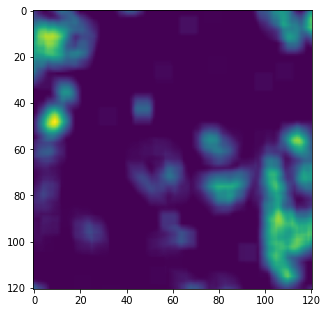

In [76]:
image_size = 2048
kernel_size = 128
stride = 16
kernel = torch.ones((1, 1, kernel_size, kernel_size))


bin_iou = F.conv2d(torch.tensor(grad_bin_img).reshape(1,1,image_size,image_size).float(), 
                    kernel, stride=stride)
bin_iou /= kernel_size * kernel_size

print(bin_iou.shape)
plt.figure(figsize=(5, 10))
plt.imshow(bin_iou.squeeze());

In [77]:
bin_iou

tensor([[[[0.1282, 0.0923, 0.0580,  ..., 0.1917, 0.2939, 0.3910],
          [0.1522, 0.1155, 0.0753,  ..., 0.2700, 0.3707, 0.4578],
          [0.1714, 0.1442, 0.1191,  ..., 0.3220, 0.4244, 0.5073],
          ...,
          [0.1144, 0.0878, 0.0643,  ..., 0.0031, 0.0028, 0.0028],
          [0.1953, 0.1552, 0.1193,  ..., 0.0166, 0.0304, 0.0401],
          [0.2488, 0.2067, 0.1650,  ..., 0.0297, 0.0522, 0.0706]]]])

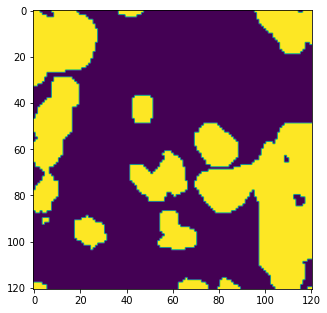

In [119]:
bin_iou_mask = bin_iou.squeeze() > 0.05
plt.figure(figsize=(5, 10))
plt.imshow(bin_iou_mask);

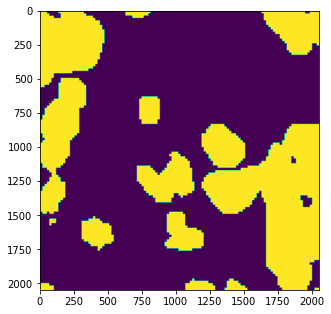

In [120]:
dst = cv2.resize(bin_iou_mask.numpy().astype(np.uint8), dsize=(2048,2048), interpolation=cv2.INTER_AREA)
plt.figure(figsize=(5, 10))
plt.imshow(dst)

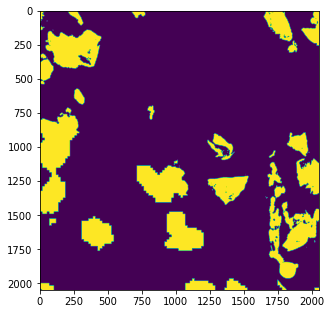

In [121]:
last_image = dst * gray_img
plt.figure(figsize=(5, 10))
plt.imshow(last_image)

(2048, 2048, 3)


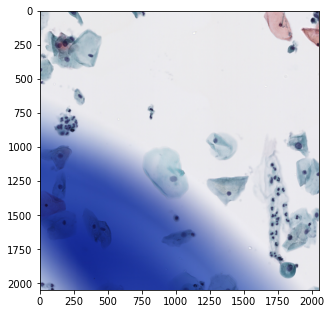

In [118]:
img = cv2.imread(abs_path + path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.medianBlur(img, 7)
print(img.shape)

plt.figure(figsize=(5, 10))
plt.imshow(img);

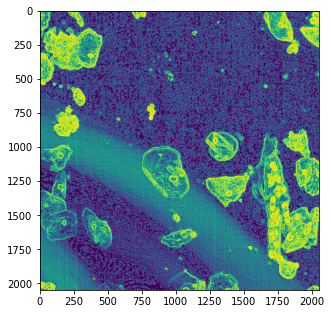

In [28]:
gard_equ = cv2.equalizeHist(scaled_grad_img.astype(np.uint8))
plt.figure(figsize=(5, 10))
plt.imshow(gard_equ)

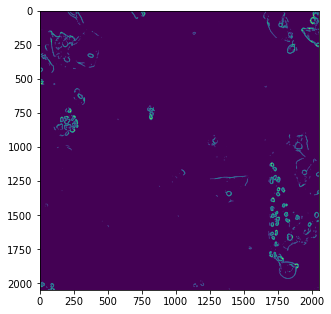

In [10]:
grad_bin_img = grad_img > 10

plt.figure(figsize=(5, 10))
plt.imshow(grad_bin_img)

In [7]:
# import matplotlib.pyplot as plt

# from skimage.draw import line, polygon, circle, ellipse
# import numpy as np


# img = np.zeros((500, 500, 3), 'uint8')

# # draw line
# rr, cc = line(120, 123, 20, 400)
# img[rr,cc,0] = 255

# # fill polygon
# poly = np.array((
#     (300, 300),
#     (480, 320),
#     (380, 430),
#     (220, 590),
#     (300, 300),
# ))
# rr, cc = polygon(poly[:,0], poly[:,1], img.shape)
# print(rr)
# print(cc)
# img[rr,cc,1] = 255

# # # fill circle
# # rr, cc = circle(200, 200, 100, img.shape)
# # img[rr,cc,:] = (255, 255, 0)

# # # fill ellipse
# # rr, cc = ellipse(300, 300, 100, 200, img.shape)
# # img[rr,cc,2] = 255

# plt.imshow(img)
# plt.show()

In [8]:
# import numpy as np
# import cv2

# contours = np.array( [ [50,50], [50,150], [150, 150], [150,50] ] )
# img = np.zeros( (200,200) ) # create a single channel 200x200 pixel black image 
# cv2.fillPoly(img, pts =[contours], color=(255,255,255))
# cv2.imshow(" ", img)
# cv2.waitKey()